# Clasificaciones de imagenes con XCEPTION

##BUILD ROBOCUP_2019 Dataset

RoboCup Dataset contains 196195 images.

8 main parent categories that contain 180 children categories.

80% for train

20% for Validate


##Importar los paquetes

In [ ]:
from tensorflow import keras
import zipfile
import tensorflow as tf
import os
from google.colab import drive
import matplotlib.pyplot as plt


## XCEPTION for subclass

###Load Data

In [ ]:
drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 150
NUM_CLASSES = 180

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


### Build model - Xception

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

#Then, freeze the base model.
base_model.trainable = False

#Create a new model on top.
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation="relu")(x)
outputs = keras.layers.Dense(180, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 180)               92340     
                                                                 
Total params: 22,002,908
Trainable params: 1,141,428
Non-trainable params: 20,861,480
_________________________________________

### Evaluate model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(), tf.keras.metrics.Precision(top_k=5, name='top_5_precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches)


Epoch 1/20
4908/4908 [==============================] - 332s 67ms/step - loss: 4.1266 - accuracy: 0.1116 - top_5_accuracy: 0.3090 - precision: 0.4849 - top_5_precision: 0.0618 - val_loss: 3.2684 - val_accuracy: 0.2029 - val_top_5_accuracy: 0.5054 - val_precision: 0.5561 - val_top_5_precision: 0.1011
Epoch 2/20
4908/4908 [==============================] - 328s 67ms/step - loss: 3.3974 - accuracy: 0.1983 - top_5_accuracy: 0.4820 - precision: 0.5644 - top_5_precision: 0.0964 - val_loss: 3.0011 - val_accuracy: 0.2525 - val_top_5_accuracy: 0.5683 - val_precision: 0.6609 - val_top_5_precision: 0.1137
Epoch 3/20
4908/4908 [==============================] - 326s 66ms/step - loss: 3.2036 - accuracy: 0.2298 - top_5_accuracy: 0.5284 - precision: 0.5971 - top_5_precision: 0.1057 - val_loss: 2.9662 - val_accuracy: 0.2716 - val_top_5_accuracy: 0.5818 - val_precision: 0.6305 - val_top_5_precision: 0.1164
Epoch 4/20
4908/4908 [==============================] - 319s 65ms/step - loss: 3.0936 - accuracy:

###print results

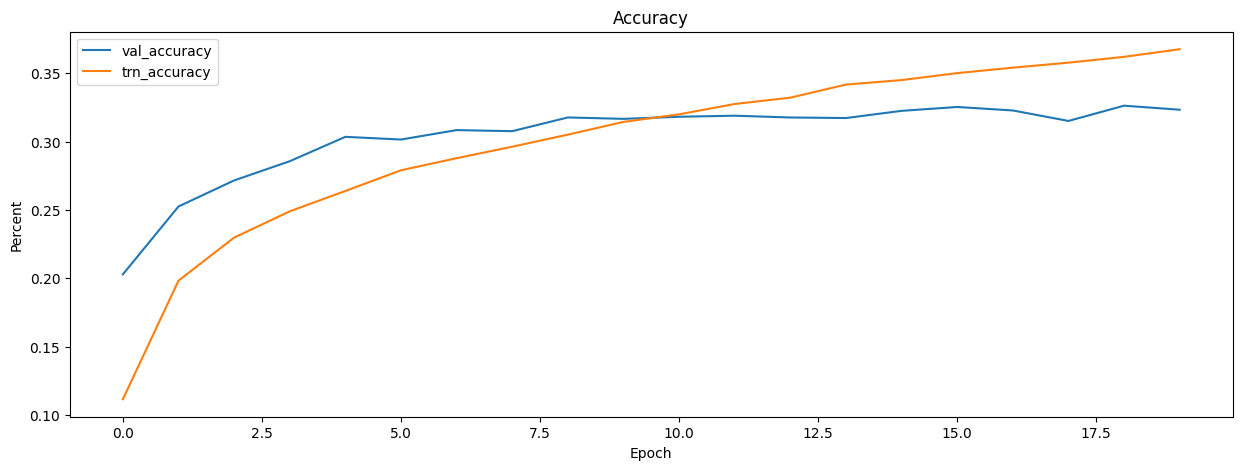

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

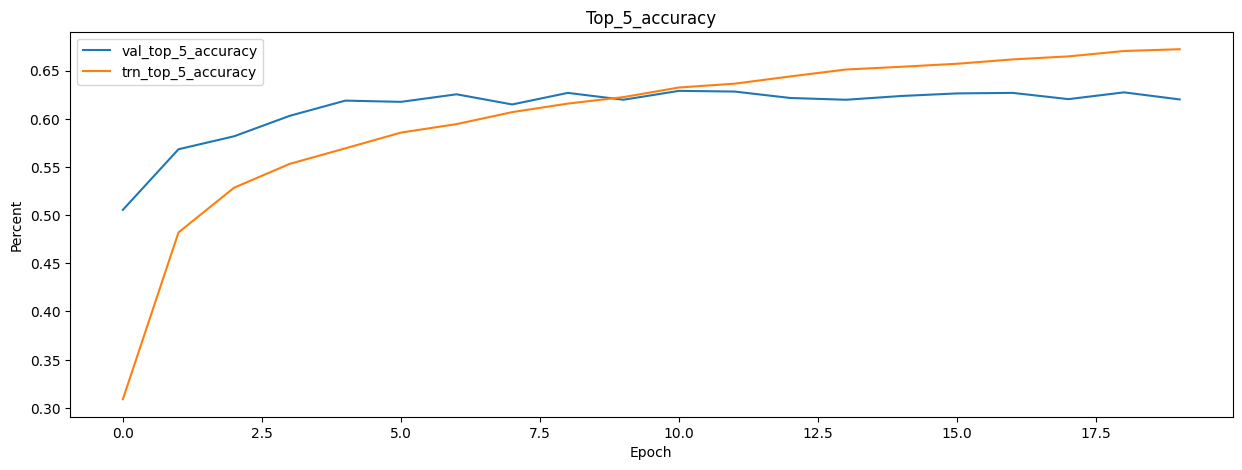

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

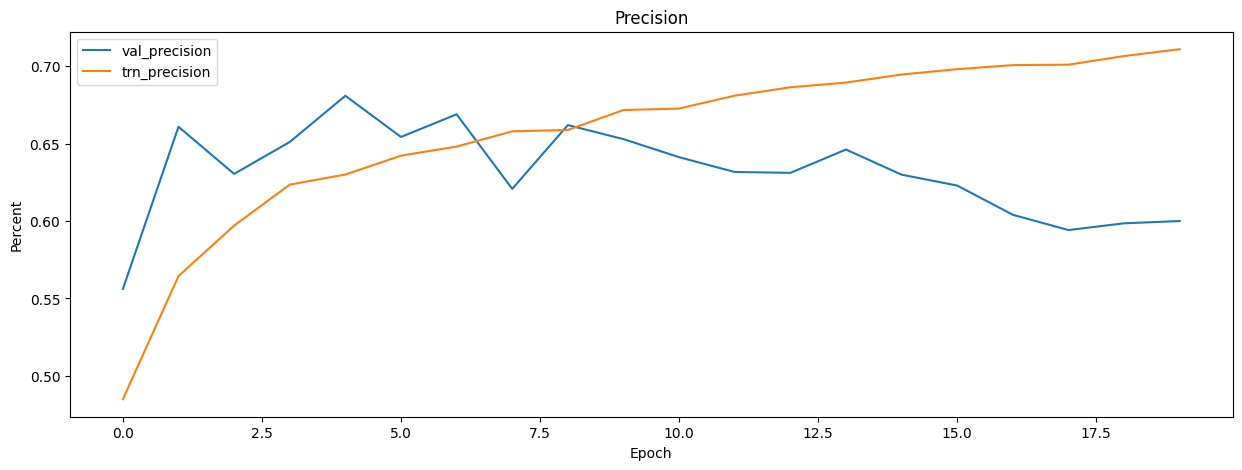

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

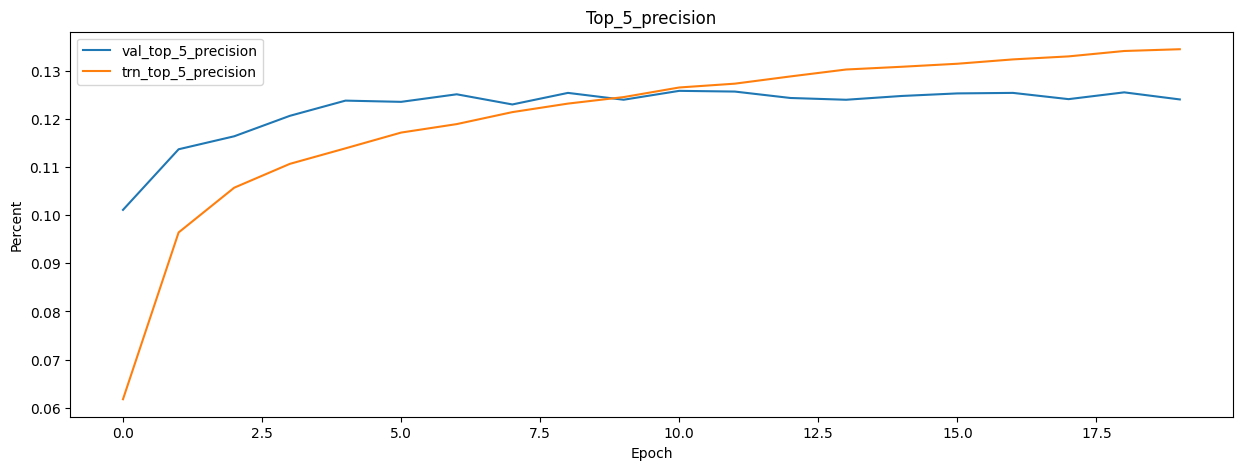

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_precision'],label='val_top_5_precision')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_precision'],label='trn_top_5_precision')
plt.title('Top_5_precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###Save Model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/xceptionModel')

## Xception for Superclass

###Load super class data

In [ ]:
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Create the model
 whose weights are generated in the previous step, when training with the fine classes.

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 150
NUM_CLASSES = 8

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/xceptionModel')
# Agregar una nueva capa de salida personalizada
new_output_layer = keras.layers.Dense(NUM_CLASSES, activation='softmax', name='superClass')(model.layers[-1].output)

# Crear un nuevo modelo con la capa de salida personalizada
model = keras.models.Model(inputs=model.input, outputs=new_output_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 180)               92340     
                                                                 
 superClass (Dense)          (None, 8)                 1448      
                                                           

### Evaluate model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches)


Epoch 1/20
4859/4859 [==============================] - 336s 68ms/step - loss: 1.4658 - accuracy: 0.6224 - top_5_accuracy: 0.9282 - precision: 0.8114 - val_loss: 1.3289 - val_accuracy: 0.6117 - val_top_5_accuracy: 0.9213 - val_precision: 0.7182
Epoch 2/20
4859/4859 [==============================] - 323s 67ms/step - loss: 1.0634 - accuracy: 0.6945 - top_5_accuracy: 0.9503 - precision: 0.8044 - val_loss: 1.2196 - val_accuracy: 0.6226 - val_top_5_accuracy: 0.9328 - val_precision: 0.7290
Epoch 3/20
4859/4859 [==============================] - 332s 68ms/step - loss: 0.9416 - accuracy: 0.7163 - top_5_accuracy: 0.9582 - precision: 0.8252 - val_loss: 1.1833 - val_accuracy: 0.6279 - val_top_5_accuracy: 0.9405 - val_precision: 0.7281
Epoch 4/20
4859/4859 [==============================] - 332s 68ms/step - loss: 0.8757 - accuracy: 0.7320 - top_5_accuracy: 0.9633 - precision: 0.8418 - val_loss: 1.1403 - val_accuracy: 0.6394 - val_top_5_accuracy: 0.9437 - val_precision: 0.7522
Epoch 5/20
4859/4859

###print results

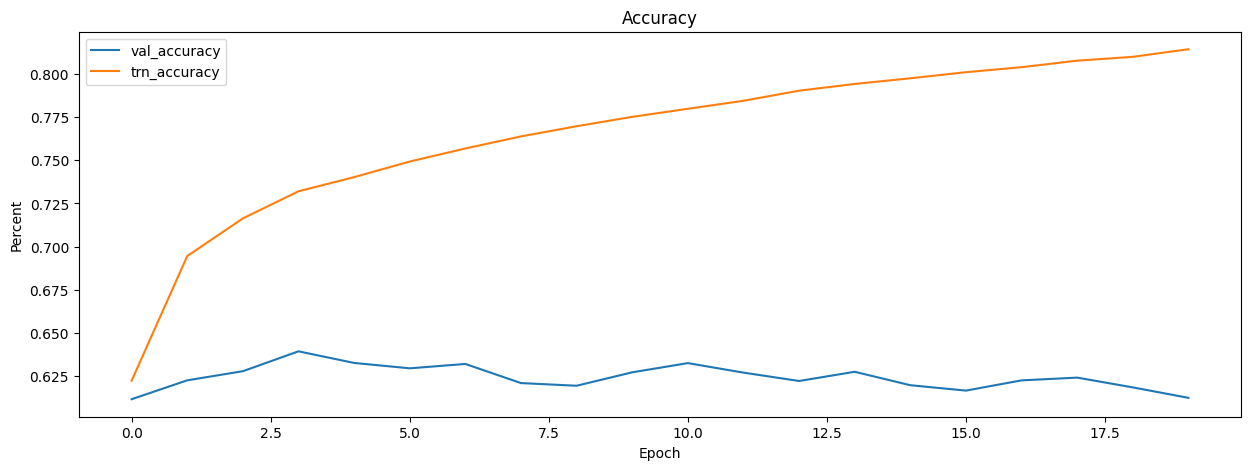

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

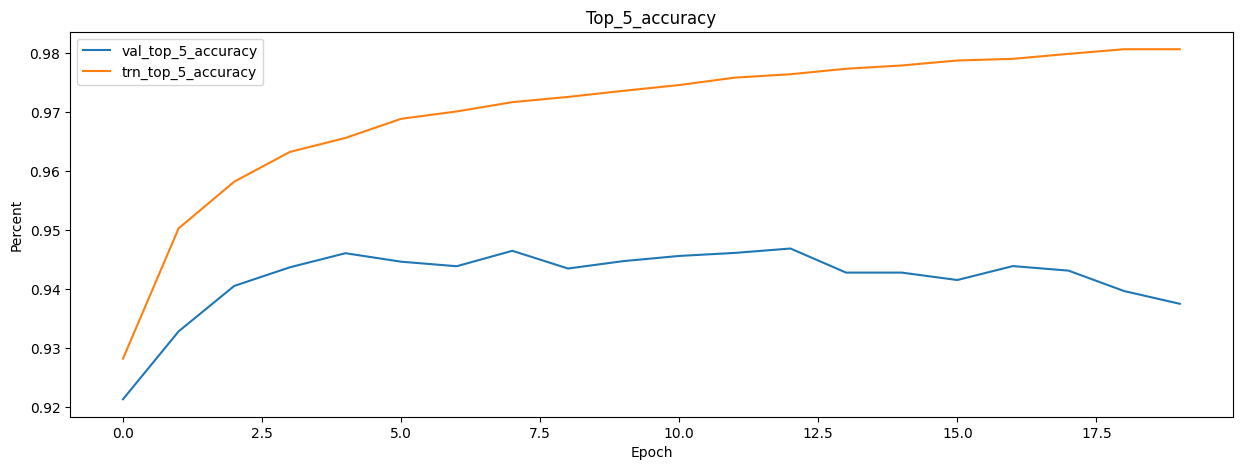

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

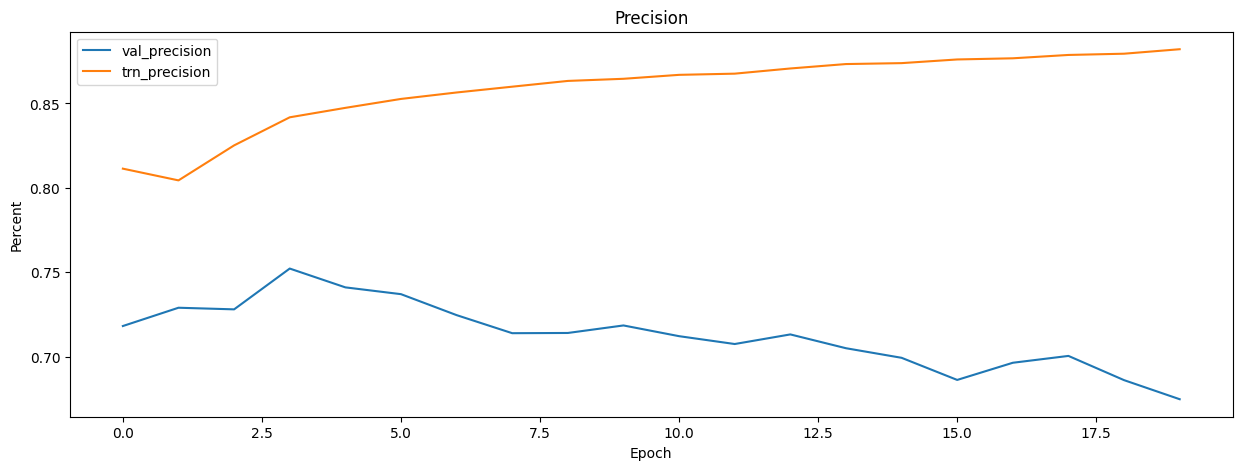

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###Save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/xceptionModel_superClass')

##Fine-tuning subClass

###Load data

In [ ]:
#drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 150
NUM_CLASSES = 180

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


###Load model previous

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/xceptionModel')
model.trainable=True
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 180)               92340     
                                                                 
Total params: 22,002,908
Trainable params: 21,948,380
Non-trainable params: 54,528
____________________________________________

###Evaluate model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-5),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=25, validation_data=valid_batches)


Epoch 1/25
4908/4908 [==============================] - 585s 109ms/step - loss: 1.9817 - accuracy: 0.4636 - top_5_accuracy: 0.7597 - precision: 0.7959 - val_loss: 2.7611 - val_accuracy: 0.3796 - val_top_5_accuracy: 0.6803 - val_precision: 0.6617
Epoch 2/25
4908/4908 [==============================] - 535s 109ms/step - loss: 1.8521 - accuracy: 0.4893 - top_5_accuracy: 0.7803 - precision: 0.8075 - val_loss: 2.7454 - val_accuracy: 0.3884 - val_top_5_accuracy: 0.6876 - val_precision: 0.6603
Epoch 3/25
4908/4908 [==============================] - 542s 111ms/step - loss: 1.7380 - accuracy: 0.5141 - top_5_accuracy: 0.7990 - precision: 0.8194 - val_loss: 2.8528 - val_accuracy: 0.3937 - val_top_5_accuracy: 0.6901 - val_precision: 0.6345
Epoch 4/25
4908/4908 [==============================] - 534s 109ms/step - loss: 1.6358 - accuracy: 0.5367 - top_5_accuracy: 0.8145 - precision: 0.8267 - val_loss: 2.8152 - val_accuracy: 0.3999 - val_top_5_accuracy: 0.6942 - val_precision: 0.6415
Epoch 5/25
4908/

###print results

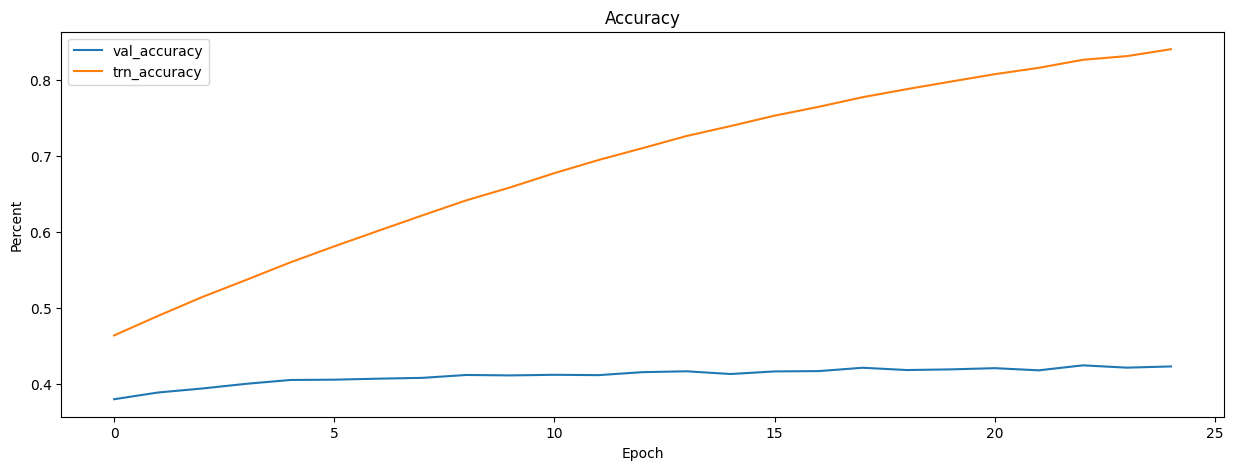

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

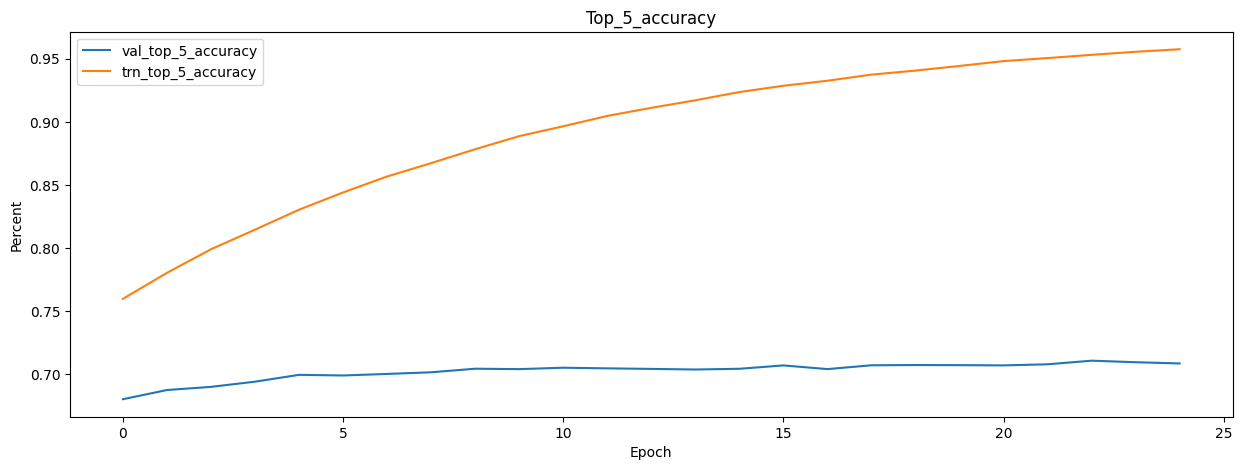

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

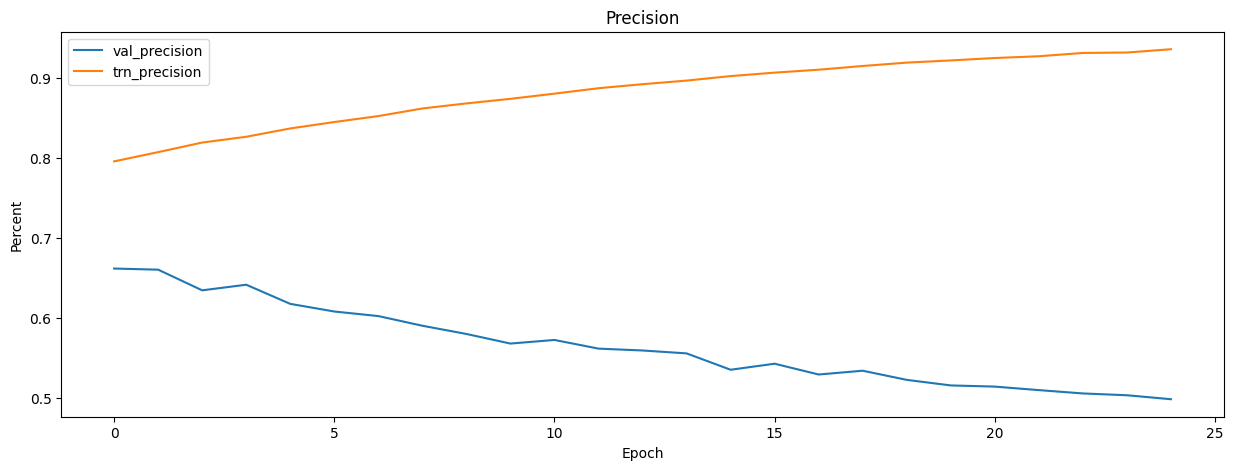

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/xception_fineTuning')

##Fine-tuning superClass

###Load data

In [ ]:
#drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 150
NUM_CLASSES = 8

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


###Load model previous

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/xceptionModel_superClass')
model.trainable=True
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 180)               92340     
                                                                 
 superClass (Dense)          (None, 8)                 1448      
                                                           

###Evaluate model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-5),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=15, validation_data=valid_batches)


Epoch 1/15
4859/4859 [==============================] - 580s 113ms/step - loss: 0.5948 - accuracy: 0.8101 - top_5_accuracy: 0.9804 - precision: 0.8783 - val_loss: 1.2568 - val_accuracy: 0.6282 - val_top_5_accuracy: 0.9424 - val_precision: 0.6919
Epoch 2/15
4859/4859 [==============================] - 546s 112ms/step - loss: 0.5391 - accuracy: 0.8293 - top_5_accuracy: 0.9829 - precision: 0.8933 - val_loss: 1.2465 - val_accuracy: 0.6323 - val_top_5_accuracy: 0.9404 - val_precision: 0.7020
Epoch 3/15
4859/4859 [==============================] - 544s 112ms/step - loss: 0.4915 - accuracy: 0.8466 - top_5_accuracy: 0.9849 - precision: 0.9057 - val_loss: 1.2338 - val_accuracy: 0.6375 - val_top_5_accuracy: 0.9437 - val_precision: 0.7017
Epoch 4/15
4859/4859 [==============================] - 547s 112ms/step - loss: 0.4564 - accuracy: 0.8584 - top_5_accuracy: 0.9863 - precision: 0.9137 - val_loss: 1.2746 - val_accuracy: 0.6274 - val_top_5_accuracy: 0.9419 - val_precision: 0.6956
Epoch 5/15
4859/

###print results

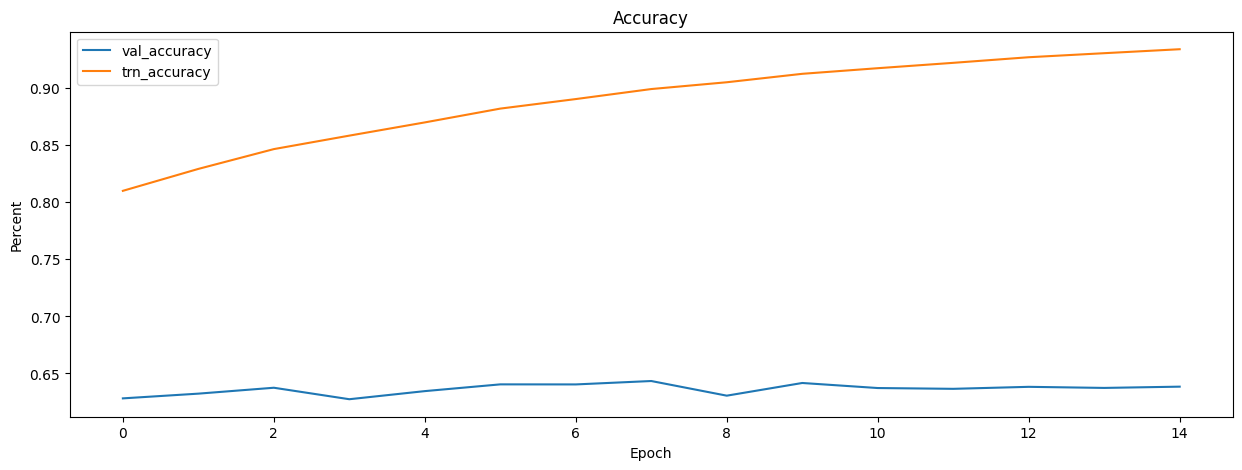

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

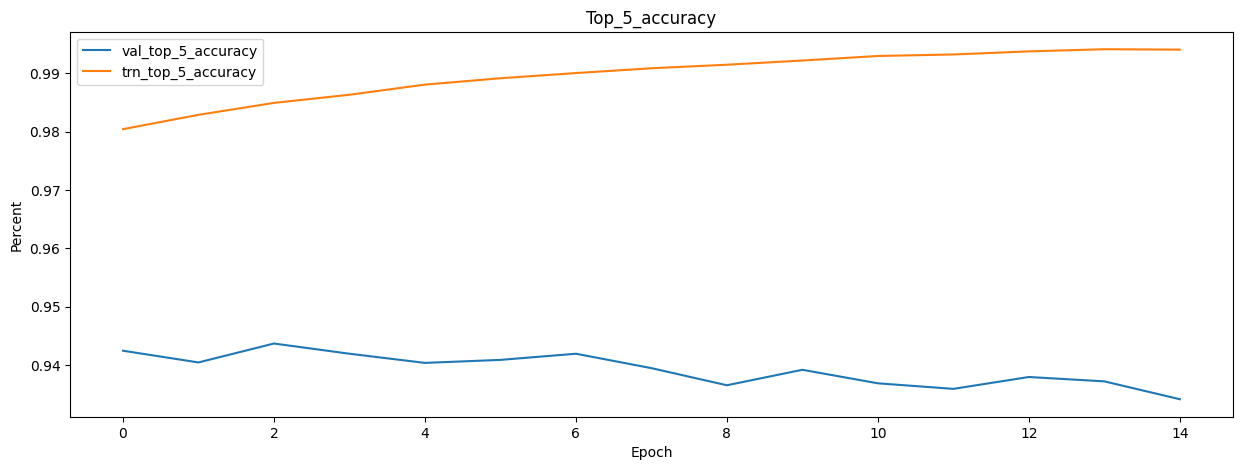

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

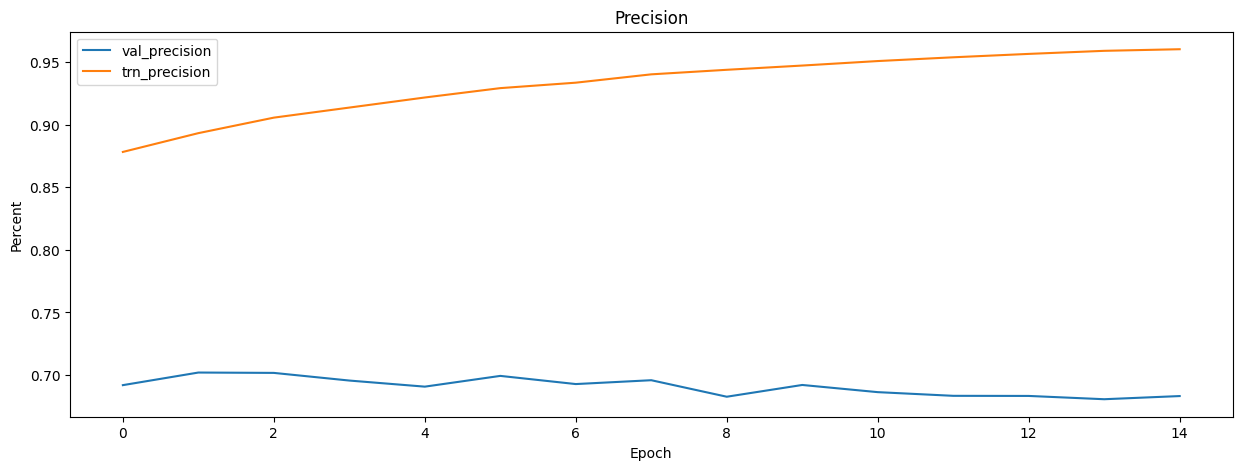

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/xception_superClass_fineTuning')

##Confusion Matrix

###Importar los paquetes

In [1]:
from tensorflow import keras
from google.colab import drive
from sklearn.metrics import confusion_matrix
import zipfile
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###Montar drive y definir el tamaño


In [2]:
drive.mount('/content/drive')
BATCH_SIZE = 32
IMG_SIZE = 224

Mounted at /content/drive


###Clases padres

In [3]:
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

In [4]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


<ipython-input-5-41403d6c4ead>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(valid_batches)


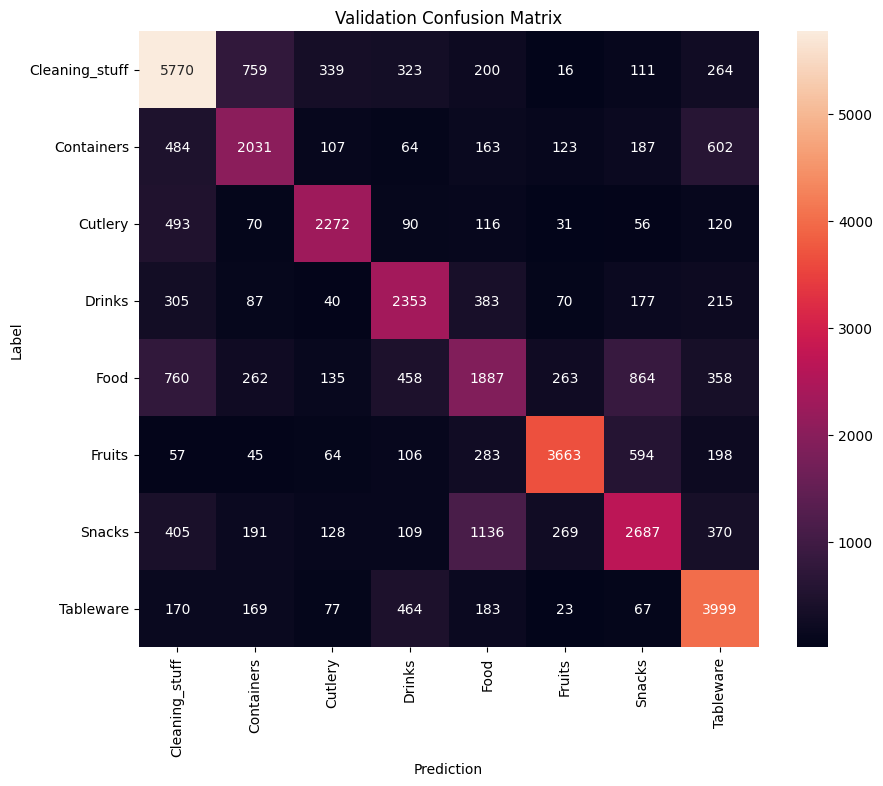

In [5]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/xception_superClass_fineTuning')

class_names = ['Cleaning_stuff', 'Containers', 'Cutlery', 'Drinks', 'Food', 'Fruits', 'Snacks', 'Tableware']

# Obtener las predicciones del modelo en el conjunto de validación
predictions = model.predict_generator(valid_batches)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales del conjunto de validación
true_classes = valid_batches.classes

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="g"
)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.title("Validation Confusion Matrix")
plt.show()

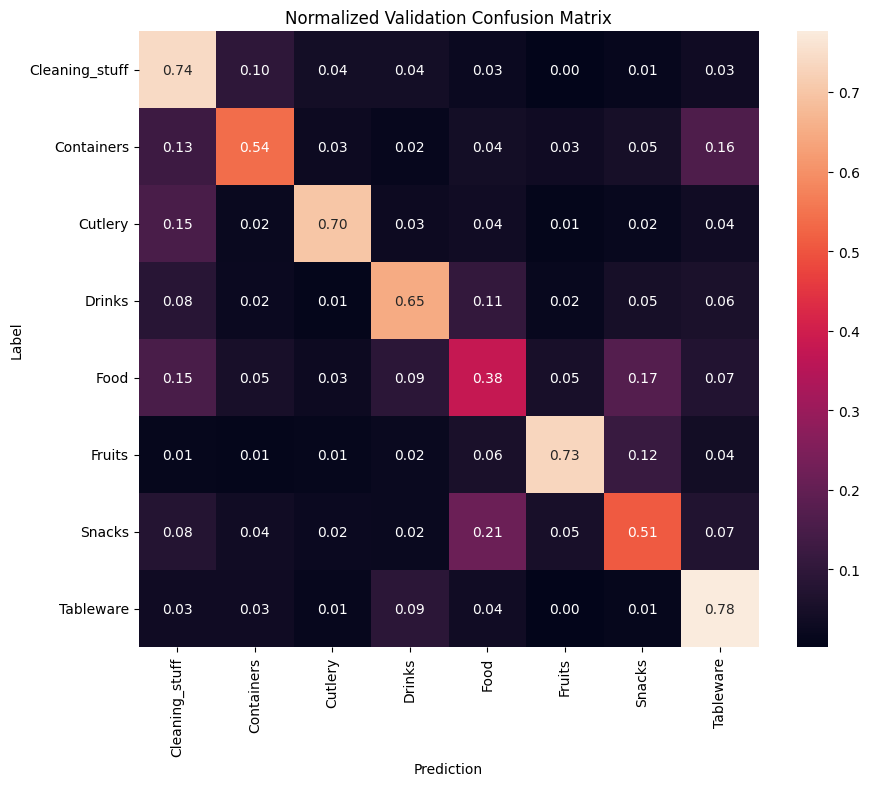

In [6]:
# Calcular el porcentaje de acierto para cada clase
class_totals = np.sum(confusion_mtx, axis=1)  # Total de instancias por clase
confusion_mtx_norm = confusion_mtx.astype('float') / class_totals[:, np.newaxis]  # Dividir cada elemento por el total de instancias en la clase correspondiente

# Plotear la matriz de confusión normalizada
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx_norm, xticklabels=class_names, yticklabels=class_names, annot=True, fmt=".2f"
)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.title("Normalized Validation Confusion Matrix")
plt.show()

###Clases hijos

In [7]:
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


In [9]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/xception_fineTuning')

# Obtener las predicciones del modelo en el conjunto de validación
predictions = model.predict_generator(valid_batches)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales del conjunto de validación
true_classes = valid_batches.classes

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

<ipython-input-9-9bcfab108822>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(valid_batches)


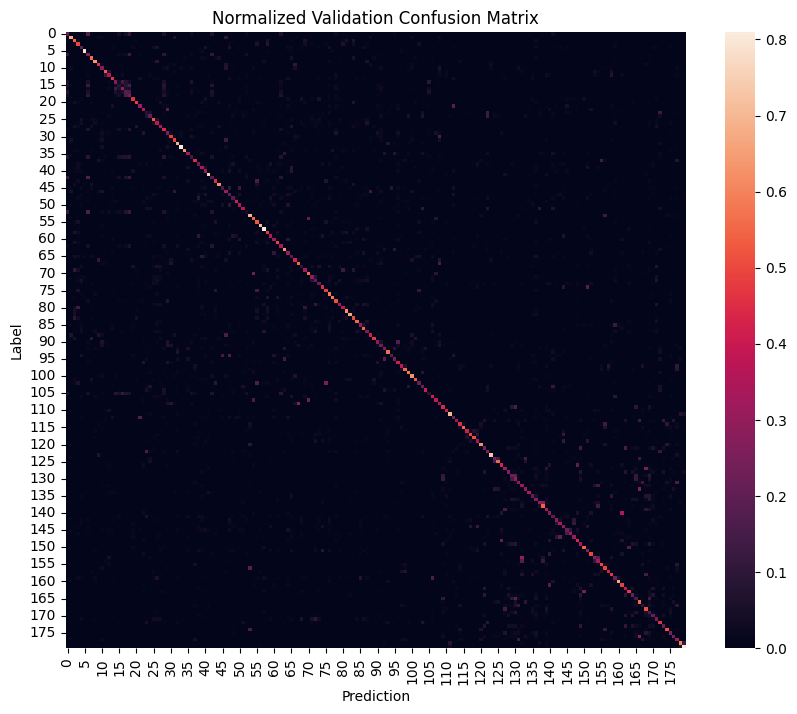

In [10]:
# Calcular el porcentaje de acierto para cada clase
class_totals = np.sum(confusion_mtx, axis=1)  # Total de instancias por clase
confusion_mtx_norm = confusion_mtx.astype('float') / class_totals[:, np.newaxis]  # Dividir cada elemento por el total de instancias en la clase correspondiente

# Plotear la matriz de confusión normalizada
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx_norm)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.title("Normalized Validation Confusion Matrix")
plt.show()